# The Sparks Foundation - Data Science & Business analytics

**Task 1:- Prediction using Supervised Machine Learning** 

**Predict percentage of students based on number of study hours.** 

Name:- Monil Contractor



In [1]:
# Importing all the required libraries
import pandas as pds
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Reading data from given link
link = pds.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv') 
link.head(11)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# To find number of columns and rows
link.shape

(25, 2)

In [4]:
# To find more information about dataset
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
link.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Check if there is any null value in dataset
link.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


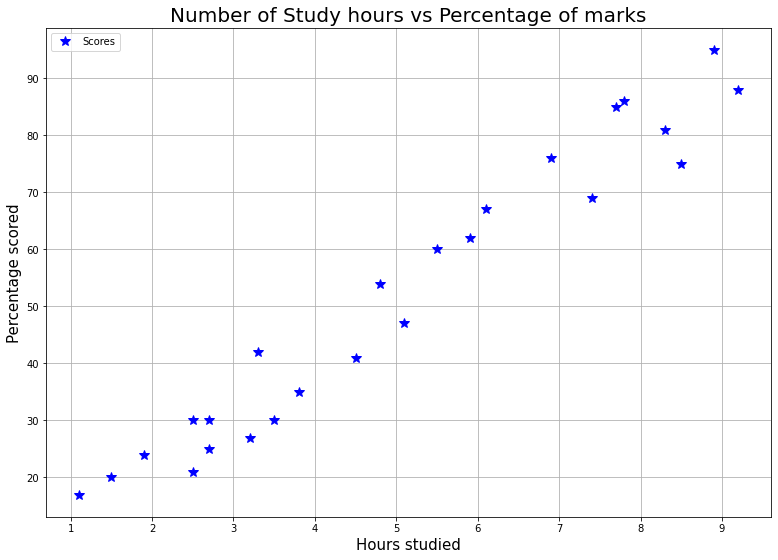

In [7]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [13,9]
link.plot(x='Hours', y='Scores', style='*', color='blue', markersize=10)
plt.title('Number of Study hours vs Percentage of marks', size=20)
plt.xlabel('Hours studied', size=15)
plt.ylabel('Percentage scored', size=15)
plt.grid()
plt.show()


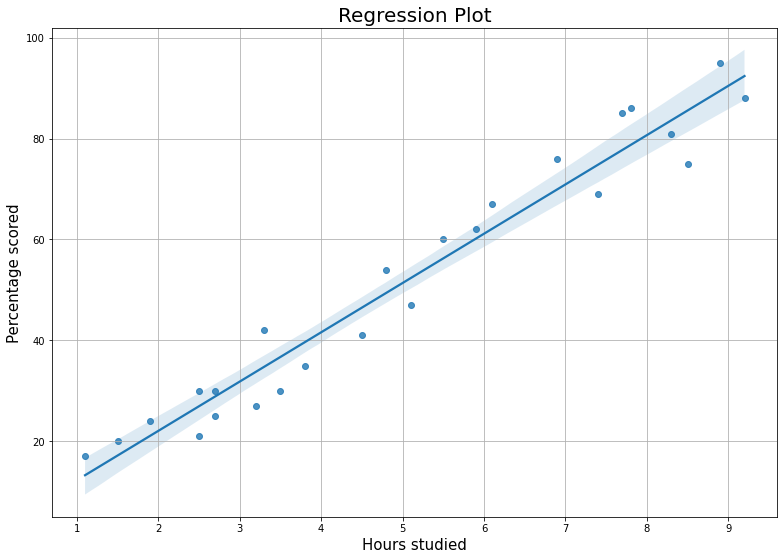

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
# Regression Plot
plt.rcParams["figure.figsize"] = [13,9]
sb.regplot(x=link['Hours'], y=link['Scores'])
plt.title('Regression Plot', size=20)
plt.xlabel('Hours studied', size=15)
plt.ylabel('Percentage scored', size=15)
plt.grid()
plt.show()
# Corelation between variables
print(link.corr())

In [9]:
# Defining value of x and y from the data using iloc function
x = link.iloc[:, :1].values
y = link.iloc[:, 1:].values


In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [12]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=0)

In [13]:
# Trining the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)


LinearRegression()

In [14]:
# Predicting the marks
pred_y = model.predict(test_x) 
prediction = pds.DataFrame({'Hours': [i[0] for i in test_x], 'Predicted marks': [k for k in pred_y]})
prediction

,Hours,Predicted marks
0,1.5,[16.844721762383802]
1,3.2,[33.74557493951356]
2,7.4,[75.50062396536356]
3,2.5,[26.786400101871894]
4,5.9,[60.58810645613142]
5,3.8,[39.710581943206414]
6,1.9,[20.821393098179037]


In [15]:
# Comparing Actual marks vs Predicted marks

compare_marks = pds.DataFrame({'Actual marks': [i[0] for i in test_y], 'Predicted Marks': [k for k in pred_y]})
compare_marks

,Actual marks,Predicted Marks
0,20,[16.844721762383802]
1,27,[33.74557493951356]
2,69,[75.50062396536356]
3,30,[26.786400101871894]
4,62,[60.58810645613142]
5,35,[39.710581943206414]
6,24,[20.821393098179037]


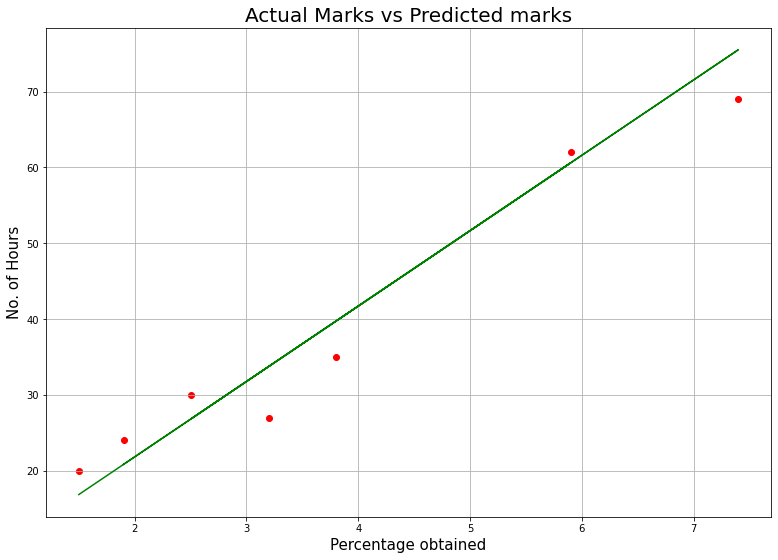

In [16]:
# Plotting for the training data
plt.rcParams["figure.figsize"] = [13,9]
plt.scatter(x=test_x, y=test_y, color='red')
plt.plot(test_x, pred_y, color='green')
plt.title('Actual Marks vs Predicted marks', size=20)
plt.xlabel('Percentage obtained', size=15)
plt.ylabel('No. of Hours', size=15)
plt.grid()
plt.show()


In [17]:
# Calculating the accuracy of the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics
mean_absolute_error=metrics.mean_absolute_error(test_y,pred_y)
print('Mean absolute error:',mean_absolute_error)
accuracy = r2_score(test_y,pred_y)
print('Accuracy:',accuracy)

Mean absolute error: 4.130879918502482
Accuracy: 0.9367661043365056


In [18]:
# Calculating the score of a student studying for 9 hours
hours= 9.25
answer = model.predict([[hours]]) 
print("Marks of a student studying for" ,hours, "hours is" ,answer[0])

Marks of a student studying for 9.25 hours is [93.89272889]
